In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
param_training = pd.read_csv('training/param_data_2.csv',
    header=None, 
    names=[
        'product_no','key_index', 'param1', 
        'param2','param3','param4',
        'param5','param6','param7',
        'param8','param9'
        ])
# use pd.read_table() to read from tab-separated files.
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html


draft_training = pd.read_csv('training/draft_data.csv',
    header=None, 
    names=[
        'product_no', 'key_index', 'draft_param1', 
        'draft_param2','draft_param3','draft_param4',
        'draft_param5','draft_param6','draft_param7',
        'draft_param8','draft_param9', 'draft_param10','draft_param11'
        ])
# use pd.read_table() to read from tab-separated files.
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html

param_test = pd.read_csv('test/param_data_test_2.csv',
    header=None, 
    names=[
        'product_no', 'param1', 
        'param2','param3','param4',
        'param5','param6','param7',
        'param8','param9'
        ])
# use pd.read_table() to read from tab-separated files.
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html


draft_test = pd.read_csv('test/draft_data_test.csv',
    header=None, 
    names=[
        'product_no', 'draft_param1', 
        'draft_param2','draft_param3','draft_param4',
        'draft_param5','draft_param6','draft_param7',
        'draft_param8','draft_param9', 'draft_param10','draft_param11'
        ])

In [4]:
training_set = pd.merge(draft_training, param_training, on=['product_no'])

test_set = pd.merge(draft_test, param_test, on=['product_no'])

# pandas sql-like merging
# http://pandas.pydata.org/pandas-docs/stable/10min.html#join

In [5]:
training_set

,product_no,key_index_x,draft_param1,draft_param2,draft_param3,draft_param4,draft_param5,draft_param6,draft_param7,draft_param8,...,key_index_y,param1,param2,param3,param4,param5,param6,param7,param8,param9
0,1,0.95475,2,0,0,343,0.065,1.0,1.05,410,...,0.95475,29.446,29.446,0,0.0,6,20,0,5,3.1
1,16,0.96158,2,0,0,343,0.065,1.0,1.05,420,...,0.96158,28.706,28.706,0,0.0,4,7,0,1,3.1
2,18,0.97640,0,0,0,343,0.065,1.0,1.05,432,...,0.97640,29.586,29.586,0,0.0,4,2,0,1,3.0
3,21,0.98534,3,1,1,343,0.075,1.0,1.30,507,...,0.98534,29.502,29.502,0,0.0,4,1,0,4,3.6
4,33,0.95501,2,0,0,343,0.065,1.0,1.05,440,...,0.95501,29.305,29.305,0,0.0,4,12,0,4,3.1
5,39,0.96629,4,0,1,343,0.075,1.0,1.30,493,...,0.96629,29.836,29.836,0,0.0,6,10,0,5,3.6
6,44,0.95081,2,0,0,343,0.065,1.0,1.05,387,...,0.95081,28.929,28.929,0,0.0,4,12,0,4,3.1
7,50,0.63188,2,0,0,343,0.065,1.0,1.05,383,...,0.63188,28.713,28.613,0,1.0,4,34,0,1,3.1
8,53,0.95200,4,0,1,343,0.075,1.0,1.30,475,...,0.95200,28.388,28.388,0,1.0,6,11,0,5,3.6
9,60,0.96559,4,0,1,343,0.075,1.0,1.30,508,...,0.96559,29.200,29.200,0,1.0,4,23,0,4,3.6


In [7]:
test_set

,product_no,draft_param1,draft_param2,draft_param3,draft_param4,draft_param5,draft_param6,draft_param7,draft_param8,draft_param9,...,draft_param11,param1,param2,param3,param4,param5,param6,param7,param8,param9
0,24,2,0,0,343,0.065,1.0,1.05,432,0.34,...,1,29.770,29.770,0,0.0,4,1,0,4,3.1
1,98,2,0,0,343,0.065,1.0,1.05,403,0.34,...,0,21.785,21.785,0,1.0,4,13,0,3,3.1
2,121,2,0,0,343,0.065,1.0,1.05,415,0.34,...,1,28.873,28.873,0,1.0,4,50,0,1,3.1
3,197,1,0,0,343,0.065,1.0,1.05,384,0.34,...,0,29.372,29.372,0,0.0,4,83,0,1,3.1
4,231,2,0,0,343,0.065,1.0,1.05,389,0.34,...,0,29.509,29.509,0,0.0,4,28,0,1,3.1
5,250,4,0,1,343,0.075,1.0,1.30,475,0.35,...,3,29.752,29.752,0,0.0,4,5,0,4,3.6
6,262,2,0,0,343,0.065,1.0,1.05,393,0.34,...,1,29.413,29.413,0,0.0,4,13,0,1,3.1
7,292,2,0,0,343,0.065,1.0,1.05,385,0.34,...,0,28.726,28.726,0,0.0,4,8,0,4,3.1
8,302,1,0,0,343,0.065,1.0,1.05,402,0.34,...,0,29.997,29.997,0,0.0,4,9,0,1,3.1
9,333,1,0,0,343,0.065,1.0,1.05,402,0.34,...,0,29.279,29.279,0,0.0,6,88,0,5,3.1


In [6]:
test_set.loc[:,'pred2'] = test_set.pred

AttributeError: 'DataFrame' object has no attribute 'pred'

In [35]:
test_set.loc[:,'pred3'] = test_set.pred

In [36]:
test_set.loc[:,['product_no','pred','pred2','pred3']].to_csv('predict_result.csv',header=False, index=False)

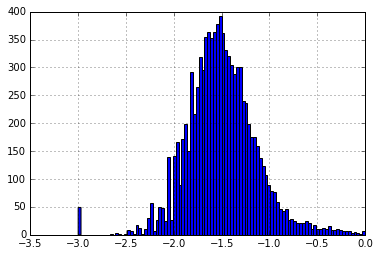

In [8]:
np.log10(1.001 - training_set.key_index_x).hist(bins=100)

# 整理为更接近正态分布的 y

In [9]:
training_set.loc[:,'y'] = np.log10(1.001 - training_set.key_index_x)

In [10]:
X = training_set.as_matrix(columns=['param1', 
        'param2','param3', #'param4',
        'param5','param6','param7',
        'param8','param9','draft_param1', 
        'draft_param2','draft_param3','draft_param4',
        'draft_param5','draft_param6','draft_param7',
        'draft_param8','draft_param9', 'draft_param10','draft_param11'])
y = training_set.as_matrix(columns=['y']).ravel()

X_pred = test_set.as_matrix(columns=['param1', 
        'param2','param3',# 'param4',
        'param5','param6','param7',
        'param8','param9','draft_param1', 
        'draft_param2','draft_param3','draft_param4',
        'draft_param5','draft_param6','draft_param7',
        'draft_param8','draft_param9', 'draft_param10','draft_param11'])
#y_pred = test_set.as_matrix(columns=['key_index_x']).ravel()

In [11]:
X.shape, X_pred.shape

((9580, 19), (2430, 19))

In [12]:
# find some nan, 无法直接扔模型, 先处理缺失值
test_set.isnull().values.any()

True

In [13]:

inds = pd.isnull(training_set).any(1).nonzero()[0]
inds


array([3164, 3165, 3166, 4626, 4627, 6368, 7862, 7863])

In [14]:
test_set.iloc[[ 359,  360, 1604, 1605],:]
training_set.iloc[[3164, 3165, 3166, 4626, 4627, 6368, 7862, 7863],:]

,product_no,key_index_x,draft_param1,draft_param2,draft_param3,draft_param4,draft_param5,draft_param6,draft_param7,draft_param8,...,param1,param2,param3,param4,param5,param6,param7,param8,param9,y
3164,11999,0.99109,4,0,1,343,0.280,0.4,1.05,538,...,11.6,11.60,0,NaN,6,24,0,1,3.6,-2.003926
3165,12005,0.93857,4,0,1,343,0.075,1.0,1.30,545,...,14.3,14.30,0,NaN,6,8,0,4,3.6,-1.204607
3166,12008,0.98209,2,0,0,343,0.065,1.0,1.05,406,...,13.5,13.50,0,NaN,6,79,0,1,3.1,-1.723308
4626,12002,0.97919,4,0,1,343,0.075,1.0,1.30,452,...,27.3,27.30,0,NaN,6,40,0,2,3.6,-1.661344
4627,12010,0.98083,2,0,0,342,0.065,1.0,1.05,401,...,21.5,21.35,0,NaN,4,3,0,3,3.1,-1.695294
6368,12009,0.97112,2,0,0,343,0.065,1.0,1.05,406,...,13.4,13.40,0,NaN,6,79,0,4,3.1,-1.524619
7862,12003,0.97616,4,0,1,343,0.075,1.0,1.30,507,...,29.6,29.60,0,NaN,4,1,0,4,3.6,-1.604848
7863,12004,0.99660,2,0,0,343,0.065,1.0,1.05,382,...,29.5,29.50,0,NaN,4,45,0,1,3.1,-2.356547


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.4, random_state=0)

clf = RandomForestRegressor(n_estimators=50)
clf = clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

clf10 = RandomForestRegressor(n_estimators=50)
clf10 = clf10.fit(X_train, y_train)

print(clf10.score(X_train, y_train))
print(clf10.score(X_test, y_test))

clf20 = RandomForestRegressor(n_estimators=50)
clf20 = clf20.fit(X_train, y_train)

print(clf20.score(X_train, y_train))
print(clf20.score(X_test, y_test))

0.853569561097
-0.029962416702
0.856157991748
-0.0192618502489
0.855481215007
-0.0200976457279


模型效果不佳, 从相关系数来看是过拟合. 看来需要进一步优化.

In [16]:
y_test_pred = clf.predict(X_test)

In [17]:
y_test

array([-1.9812995 , -1.49322446, -1.5543958 , ..., -1.53209605,
       -1.52258931, -1.38310457])

In [18]:
y_test_pred

array([-1.63193447, -1.55517752, -1.60904113, ..., -1.48935921,
       -1.46892436, -1.42893157])

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/mofrankhu/.pyenv/versions/3.5.1/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


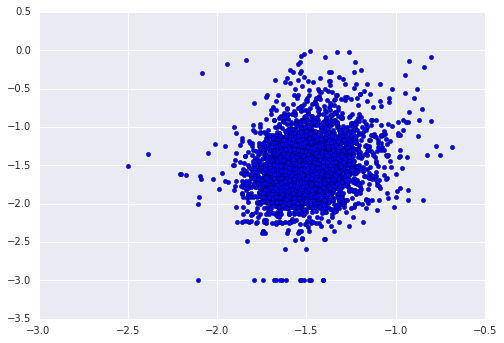

In [20]:
plt.scatter(y_test_pred, y_test)

In [21]:
y_pred = clf.predict(X_pred)

In [22]:
y_pred

array([-1.16889775, -1.59189994, -1.58036249, ..., -1.60922458,
       -1.44180693, -1.48628599])

In [23]:
1.001 - 10 **  y_pred 

array([ 0.93321989,  0.97540825,  0.97471926, ...,  0.97640904,
        0.96484294,  0.96836272])

In [24]:
test_set.loc[:,'y_pred'] = 1.001 - 10 **  y_pred

In [29]:
y_pred10 = clf10.predict(X_pred)
y_pred20 = clf20.predict(X_pred)
test_set.loc[:,'y_pred10'] = 1.001 - 10 **  y_pred10
test_set.loc[:,'y_pred20'] = 1.001 - 10 **  y_pred20

In [30]:
test_set

,product_no,draft_param1,draft_param2,draft_param3,draft_param4,draft_param5,draft_param6,draft_param7,draft_param8,draft_param9,...,param3,param4,param5,param6,param7,param8,param9,y_pred,y_pred10,y_pred20
0,24,2,0,0,343,0.065,1.0,1.05,432,0.34,...,0,0.0,4,1,0,4,3.1,0.933220,0.927241,0.923776
1,98,2,0,0,343,0.065,1.0,1.05,403,0.34,...,0,1.0,4,13,0,3,3.1,0.975408,0.977283,0.973892
2,121,2,0,0,343,0.065,1.0,1.05,415,0.34,...,0,1.0,4,50,0,1,3.1,0.974719,0.959215,0.974296
3,197,1,0,0,343,0.065,1.0,1.05,384,0.34,...,0,0.0,4,83,0,1,3.1,0.976494,0.972558,0.975068
4,231,2,0,0,343,0.065,1.0,1.05,389,0.34,...,0,0.0,4,28,0,1,3.1,0.978120,0.980172,0.980380
5,250,4,0,1,343,0.075,1.0,1.30,475,0.35,...,0,0.0,4,5,0,4,3.6,0.944260,0.946713,0.950997
6,262,2,0,0,343,0.065,1.0,1.05,393,0.34,...,0,0.0,4,13,0,1,3.1,0.977678,0.972422,0.973429
7,292,2,0,0,343,0.065,1.0,1.05,385,0.34,...,0,0.0,4,8,0,4,3.1,0.974188,0.975025,0.965187
8,302,1,0,0,343,0.065,1.0,1.05,402,0.34,...,0,0.0,4,9,0,1,3.1,0.975598,0.973195,0.972670
9,333,1,0,0,343,0.065,1.0,1.05,402,0.34,...,0,0.0,6,88,0,5,3.1,0.953799,0.971192,0.965972


In [31]:
test_set.loc[:,['product_no','y_pred','y_pred10','y_pred20']].to_csv('predict_result.csv',header=False, index=False)